---

# **title: '자전거'**

# **date: '2022-07-08 09:00'**

---


In [151]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## step 01. 필수 라이브러리 불러오기
- 주석

In [152]:
import pandas as pd # 데이터 가공
import numpy as np # 수치 연산
import matplotlib as mpl # 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns # 시각화 
import sklearn # 머신러닝

# 버전 확인
print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
# matplotlib
# sklearn
# seaborn

pandas version : 1.3.5
numpy version : 1.21.6


## step 02. 데이터 불러오기
- 데이터를 불러온다. 

In [153]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/Human_ai/lecture/bike/'

train = pd.read_csv(DATA_PATH + 'train.csv') # 훈련 데이터
test = pd.read_csv(DATA_PATH + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(DATA_PATH + 'sampleSubmission.csv') # 제출 샘플 데이터

train.shape, test.shape, submission.shape

((10886, 12), (6493, 9), (6493, 2))

## step 03. 데이터 확인하기

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [155]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


- 현재 판단으로는 결측치가 없어 보임. 

## step 03. 탐색적 자료 분석
- 시각화
- 날짜 기반
- train 다이렉트로 변화를 주면 전처리 시 헷갈림
- 복제본 뜬다. (탐색적 자료 분석)
- 데이터 셋 매우 작음
    + 전체를 다 써도 큰 상관 없음
    + 전체 데이터에서 일부 샘플링 함

In [156]:
temp_df = train.copy()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- 시각화를 위한 날짜 데이터 처리
- 연도, 월, 일자, 시간, 분, 초


In [157]:
temp_df['datetime'][:10]

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
5    2011-01-01 05:00:00
6    2011-01-01 06:00:00
7    2011-01-01 07:00:00
8    2011-01-01 08:00:00
9    2011-01-01 09:00:00
Name: datetime, dtype: object

In [158]:
print(temp_df['datetime'][0].split()[1])
print(temp_df['datetime'][100].split()[0].split('-')[2])

00:00:00
05


In [159]:
year = temp_df['datetime'][100].split()[0].split('-')[0]
month = temp_df['datetime'][100].split()[0].split('-')[1]
day = temp_df['datetime'][100].split()[0].split('-')[2]

print(year, month, day)

2011 01 05


In [160]:
hour = temp_df['datetime'][2].split()[1].split(':')[0]
minutes = temp_df['datetime'][2].split()[1].split(':')[1]
seconds = temp_df['datetime'][2].split()[1].split(':')[2]

hour, minutes, seconds

('02', '00', '00')

In [161]:
temp_df['datetime'][0].split()[0]

'2011-01-01'

- 시간 데이터 전처리 방법론 1. 

In [162]:
import time 
import datetime 

# 시간 테스트 
start_time = time.time()

temp_df['date'] = temp_df['datetime'].apply(lambda x : x.split()[0])
temp_df['year'] = temp_df['datetime'].apply(lambda x : x.split()[0].split('-')[0])
temp_df['month'] = temp_df['datetime'].apply(lambda x : x.split()[0].split('-')[1])
temp_df['day'] = temp_df['datetime'].apply(lambda x : x.split()[0].split('-')[2])
temp_df['hour'] = temp_df['datetime'].apply(lambda x : x.split()[1].split(':')[0])

end_time = time.time() 
lambda_ctime = end_time - start_time

print("실행시간 (second) -> ", np.round(lambda_ctime, 3))
temp_df[['datetime', 'year', 'month', 'day', 'hour']]

실행시간 (second) ->  0.043


,datetime,year,month,day,hour
0,2011-01-01 00:00:00,2011,01,01,00
1,2011-01-01 01:00:00,2011,01,01,01
2,2011-01-01 02:00:00,2011,01,01,02
3,2011-01-01 03:00:00,2011,01,01,03
4,2011-01-01 04:00:00,2011,01,01,04
...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19
10882,2012-12-19 20:00:00,2012,12,19,20
10883,2012-12-19 21:00:00,2012,12,19,21
10884,2012-12-19 22:00:00,2012,12,19,22


- 시간 데이터 방법론 전처리 2

In [163]:
temp_df['date'] = pd.to_datetime(temp_df['datetime'])
temp_df['year'] = temp_df['date'].dt.year

In [164]:
import time 
import datetime 

# 시간 테스트 
start_time = time.time()

temp_df['date'] = pd.to_datetime(temp_df['datetime'])
temp_df['year'] = temp_df['date'].dt.year
temp_df['month'] = temp_df['date'].dt.month
temp_df['day'] = temp_df['date'].dt.day
temp_df['hour'] = temp_df['date'].dt.hour

end_time = time.time() 
dt_ctime = end_time - start_time

print("실행시간 (second) -> ", np.round(dt_ctime, 3))

temp_df[['datetime', 'year', 'month', 'day', 'hour']]

실행시간 (second) ->  0.013


,datetime,year,month,day,hour
0,2011-01-01 00:00:00,2011,1,1,0
1,2011-01-01 01:00:00,2011,1,1,1
2,2011-01-01 02:00:00,2011,1,1,2
3,2011-01-01 03:00:00,2011,1,1,3
4,2011-01-01 04:00:00,2011,1,1,4
...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19
10882,2012-12-19 20:00:00,2012,12,19,20
10883,2012-12-19 21:00:00,2012,12,19,21
10884,2012-12-19 22:00:00,2012,12,19,22


In [165]:
temp_df['date']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: date, Length: 10886, dtype: datetime64[ns]

- 요일 추출하기

In [166]:
temp_df['date']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: date, Length: 10886, dtype: datetime64[ns]

In [167]:
temp_df['weekday'] = temp_df['date'].dt.day_name()
temp_df['weekday']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: weekday, Length: 10886, dtype: object

In [168]:
temp_df['season'] = temp_df['season'].map({
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
})

temp_df['season']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
10881    Winter
10882    Winter
10883    Winter
10884    Winter
10885    Winter
Name: season, Length: 10886, dtype: object

In [169]:
temp_df['weather'] = temp_df['weather'].map({
    1 : 'Clear', 
    2 : 'Few clouds', 
    3 : 'Light Snow, Rain', 
    4 : 'Heavy Snow, Rain'
})

temp_df['weather']

0        Clear
1        Clear
2        Clear
3        Clear
4        Clear
         ...  
10881    Clear
10882    Clear
10883    Clear
10884    Clear
10885    Clear
Name: weather, Length: 10886, dtype: object

In [170]:
temp_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4,Saturday


## step 04. 데이터 시각화
- 수치를 예측하는 대회
- 종속 변수를 시각화 해야 함. 
- 분포 확인 후, 로그변환을 줄지 안줄지 결정 해야 함. 

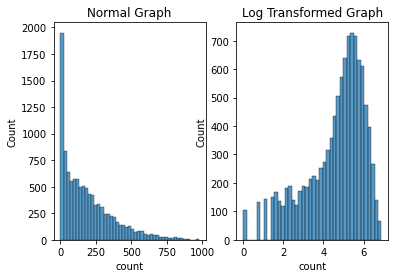

In [171]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

sns.histplot(train['count'], ax = ax[0]) 
sns.histplot(np.log(train['count']), ax = ax[1])

# 옵션 제목
ax[0].set_title('Normal Graph')
ax[1].set_title("Log Transformed Graph")

plt.show()

- 막대 그래프
    + year, count 
    + month, count
    + day, count 
    + hour, count
- 각 그래프의 타이틀 추가 

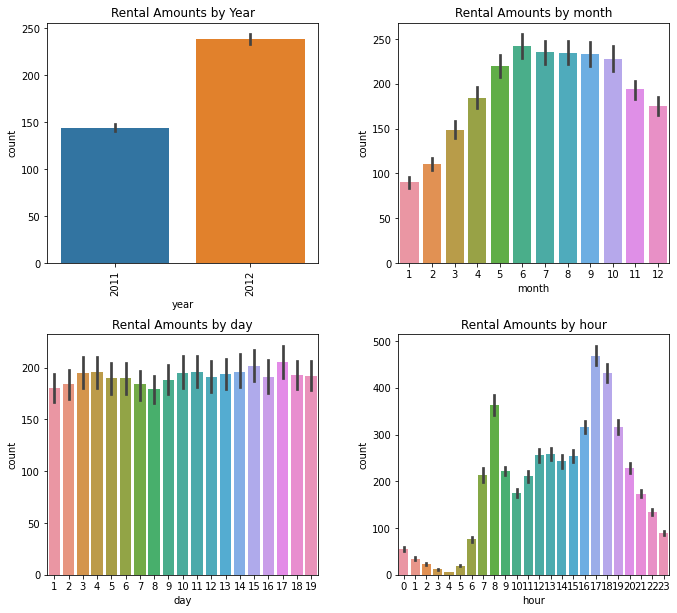

In [172]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

## 1단계 : 전체 그래프 기본 설정
# 그래프 사이 간격
fig.tight_layout()

# 전체 그래프 사이즈 관리
fig.set_size_inches(10, 9)

## 2단계 :  각 개별 그래프 입력
sns.barplot(x = 'year', y = 'count', data = temp_df, ax=ax[0,0])
sns.barplot(x = 'month',y = 'count', data = temp_df, ax=ax[0,1])
sns.barplot(x = 'day', y = 'count', data = temp_df, ax=ax[1,0])
sns.barplot(x = 'hour', y = 'count', data = temp_df, ax=ax[1,1])

## 3단계 : 디테일 옵션
ax[0, 0].set_title("Rental Amounts by Year")
ax[0, 1].set_title("Rental Amounts by month")
ax[1, 0].set_title("Rental Amounts by day")
ax[1, 1].set_title("Rental Amounts by hour")

ax[0, 0].tick_params(axis = 'x', labelrotation=90)

plt.show()

- boxplot
    + season, count
    + weather, count
    + holiday, count
    + workingday, count

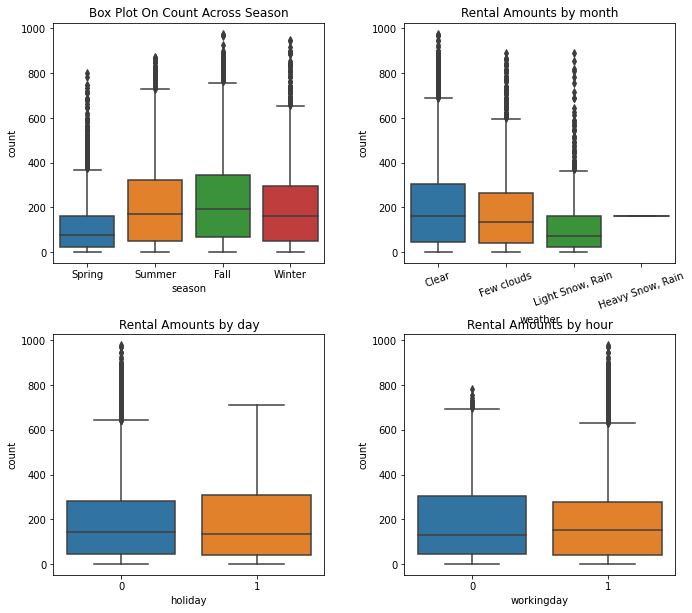

In [173]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

## 1단계 : 전체 그래프 기본 설정
# 그래프 사이 간격
fig.tight_layout()

# 전체 그래프 사이즈 관리
fig.set_size_inches(10, 9)

## 2단계 :  각 개별 그래프 입력
sns.boxplot(x = 'season', y = 'count', data = temp_df, ax=ax[0,0])
sns.boxplot(x = 'weather',y = 'count', data = temp_df, ax=ax[0,1])
sns.boxplot(x = 'holiday', y = 'count', data = temp_df, ax=ax[1,0])
sns.boxplot(x = 'workingday', y = 'count', data = temp_df, ax=ax[1,1])

## 3단계 : 디테일 옵션
ax[0, 0].set_title("Box Plot On Count Across Season")
ax[0, 1].set_title("Rental Amounts by month")
ax[1, 0].set_title("Rental Amounts by day")
ax[1, 1].set_title("Rental Amounts by hour")

ax[0, 1].tick_params(axis = 'x', labelrotation=20)

plt.show()

- 포인트 플롯
- 5개의 행 그래프 작성
    + workingday, holiday, weekday, season, weather
 - 5개의 그래프를 한 이미지로 그리세요. 

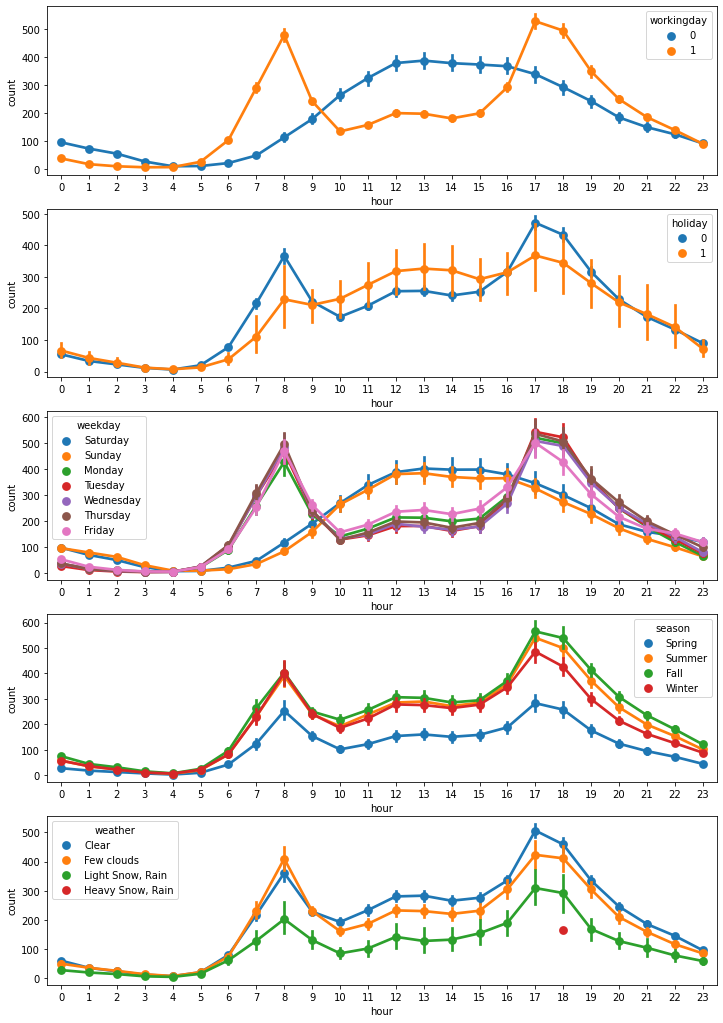

In [174]:
fig, ax = plt.subplots(nrows = 5)
fig.set_size_inches(12, 18)

sns.pointplot(x = 'hour', y = 'count', hue = 'workingday', data = temp_df, ax = ax[0])
sns.pointplot(x = 'hour', y = 'count', hue = 'holiday', data = temp_df, ax = ax[1])
sns.pointplot(x = 'hour', y = 'count', hue = 'weekday', data = temp_df, ax = ax[2])
sns.pointplot(x = 'hour', y = 'count', hue = 'season', data = temp_df, ax = ax[3])
sns.pointplot(x = 'hour', y = 'count', hue = 'weather', data = temp_df, ax = ax[4])

plt.show()

- 회귀선을 포함한 산점도 그래프
    + x, y 모두 수치형 그래프여야 함. 
    + 연속형 수치형 데이터야 함. 
- 총 4개의 그래프가 나와야 함. 

In [175]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  datetime64[ns]
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

In [176]:
temp_df['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

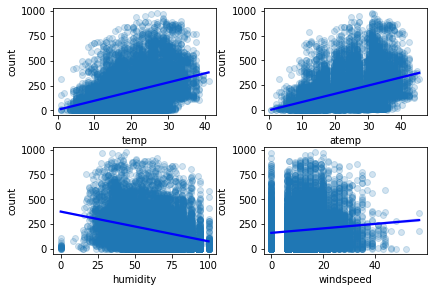

In [177]:
fig, ax = plt.subplots(nrows=2, ncols =2)

fig.tight_layout()

sns.regplot(x ='temp', y ='count', data = temp_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'blue'}, ax = ax[0, 0])
sns.regplot(x ='atemp', y ='count', data = temp_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'blue'}, ax = ax[0, 1])
sns.regplot(x ='humidity', y ='count', data = temp_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'blue'}, ax = ax[1, 0])
sns.regplot(x ='windspeed', y ='count', data = temp_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'blue'}, ax = ax[1, 1])
plt.show()

- 히트맵 그래프 그리기
- 상관계수 해석
    + 수치가 양수다 (양의 관계)
    + 수치가 음수다 (음의 관계)
    + 0~0.2 : 두 변수 사이의 상관관계는 없다. 
    + 0.2 ~ 1: 값이 커지면 커질수록 두 변수 간 상관관계는 크다. 
    

In [178]:
corrMat = temp_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
corrMat

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


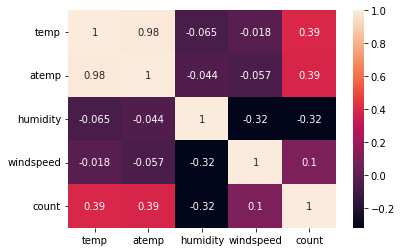

In [179]:
sns.heatmap(corrMat, annot=True)

## 데이터 전처리
- 첫번째 : train 데이터의 causal, registered 컬럼 제거할 것임
- 두번째 : 날짜 데이터 처리, dt.month, 이렇게 할 것
- 세번째 : season 컬럼 처리 필요 (숫자를 문자로 바꾸자)
    + 인코딩 변환 (라벨인코딩, 원핫 인코딩) 
- 네번째 : weather 컬럼 처리 필요 (숫자를 문자로 바꾸자)
    + 인코딩 변환 (라벨인코딩, 원핫 인코딩)
- 다섯번째 : month, day 컬럼 삭제 예정
- 여섯번째 : weather 4인 데이터는 삭제 (이상치)
- 일곱번째 : windspeed 컬럼 삭제 
- 여덟번째 : temp, atemp중 하나 삭제 (옵션)
- 마지막 : 모든 문자를 숫자로 인코딩 (원-핫 인코딩)

### 첫번째
- train 데이터의 causal, registered 컬럼 제거

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [181]:
train = train.drop(['casual', 'registered'], axis = 1)
train.shape, test.shape

((10886, 10), (6493, 9))

## weather 컬럼 지우기
- 4인 데이터는 삭제

In [182]:
train = train[train['weather'] != 4].reset_index(drop=True)
train.shape

(10885, 10)

### 데이터 합치기
- train, test 데이터 합치기

In [207]:
all_data = pd.concat([train, test], ignore_index=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   holiday                   17378 non-null  int64  
 1   workingday                17378 non-null  int64  
 2   temp                      17378 non-null  float64
 3   atemp                     17378 non-null  float64
 4   humidity                  17378 non-null  int64  
 5   year                      17378 non-null  int64  
 6   hour                      17378 non-null  int64  
 7   season_Fall               17378 non-null  uint8  
 8   season_Spring             17378 non-null  uint8  
 9   season_Summer             17378 non-null  uint8  
 10  season_Winter             17378 non-null  uint8  
 11  weather_Clear             17378 non-null  uint8  
 12  weather_Few clouds        17378 non-null  uint8  
 13  weather_Heavy Snow, Rain  17378 non-null  uint8  
 14  weathe

### 두번째 & 다섯번째 
- 날짜 데이터 처리, dt.month, 이렇게 할 것
- month, day 컬럼 삭제 예정

In [184]:
all_data['date'] = pd.to_datetime(all_data['datetime'])
all_data['year'] = all_data['date'].dt.year
all_data['hour'] = all_data['date'].dt.hour
all_data['weekday'] = all_data['date'].dt.day_name()

all_data.shape

(17378, 14)

In [185]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17378 non-null  object        
 1   season      17378 non-null  int64         
 2   holiday     17378 non-null  int64         
 3   workingday  17378 non-null  int64         
 4   weather     17378 non-null  int64         
 5   temp        17378 non-null  float64       
 6   atemp       17378 non-null  float64       
 7   humidity    17378 non-null  int64         
 8   windspeed   17378 non-null  float64       
 9   count       10885 non-null  float64       
 10  date        17378 non-null  datetime64[ns]
 11  year        17378 non-null  int64         
 12  hour        17378 non-null  int64         
 13  weekday     17378 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(7), object(2)
memory usage: 1.9+ MB


### 세번째 
- season 컬럼 처리 필요 (숫자를 문자로 바꾸자)
    + 인코딩 변환 (라벨인코딩, 원핫 인코딩) 

In [186]:
all_data['season'] = all_data['season'].map({
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
})

all_data.shape

(17378, 14)

In [187]:
all_data['season']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
17373    Spring
17374    Spring
17375    Spring
17376    Spring
17377    Spring
Name: season, Length: 17378, dtype: object

### 네번째
- weather 컬럼 처리 필요 (숫자를 문자로 바꾸자)
    + 인코딩 변환 (라벨인코딩, 원핫 인코딩)


In [188]:
all_data['weather'] = all_data['weather'].map({
    1 : 'Clear', 
    2 : 'Few clouds', 
    3 : 'Light Snow, Rain', 
    4 : 'Heavy Snow, Rain'
})

all_data.shape

(17378, 14)

In [189]:
all_data['weather']

0             Clear
1             Clear
2             Clear
3             Clear
4             Clear
            ...    
17373    Few clouds
17374    Few clouds
17375         Clear
17376         Clear
17377         Clear
Name: weather, Length: 17378, dtype: object

### 다섯번째
- weather 4인 데이터는 삭제 (이상치)
    + 4 대신, 'Heavy Snow, Rain'

In [190]:
all_data.shape

(17378, 14)

In [191]:
# all_data['weather'].value_counts()

- all_data에서 지우는 것이 아니라, train에서만 지워야 함.

In [192]:
# all_data = all_data[all_data['weather'] != 'Heavy Snow, Rain']
# all_data.shape

## 일곱번째 
- windspeed 컬럼 삭제
- train만 제거

In [193]:
all_data = all_data.drop('windspeed', axis = 1)
all_data.shape

(17378, 13)

In [194]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17378 non-null  object        
 1   season      17378 non-null  object        
 2   holiday     17378 non-null  int64         
 3   workingday  17378 non-null  int64         
 4   weather     17378 non-null  object        
 5   temp        17378 non-null  float64       
 6   atemp       17378 non-null  float64       
 7   humidity    17378 non-null  int64         
 8   count       10885 non-null  float64       
 9   date        17378 non-null  datetime64[ns]
 10  year        17378 non-null  int64         
 11  hour        17378 non-null  int64         
 12  weekday     17378 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 1.7+ MB


### date 컬럼 제거


In [195]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17378 non-null  object        
 1   season      17378 non-null  object        
 2   holiday     17378 non-null  int64         
 3   workingday  17378 non-null  int64         
 4   weather     17378 non-null  object        
 5   temp        17378 non-null  float64       
 6   atemp       17378 non-null  float64       
 7   humidity    17378 non-null  int64         
 8   count       10885 non-null  float64       
 9   date        17378 non-null  datetime64[ns]
 10  year        17378 non-null  int64         
 11  hour        17378 non-null  int64         
 12  weekday     17378 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 1.7+ MB


In [196]:
all_data = all_data.drop(['datetime', 'date'], axis = 1)
all_data.shape

(17378, 11)

### 원-핫 인코딩
- 

In [197]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)
all_data.shape

(17378, 23)

In [198]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   holiday                   17378 non-null  int64  
 1   workingday                17378 non-null  int64  
 2   temp                      17378 non-null  float64
 3   atemp                     17378 non-null  float64
 4   humidity                  17378 non-null  int64  
 5   count                     10885 non-null  float64
 6   year                      17378 non-null  int64  
 7   hour                      17378 non-null  int64  
 8   season_Fall               17378 non-null  uint8  
 9   season_Spring             17378 non-null  uint8  
 10  season_Summer             17378 non-null  uint8  
 11  season_Winter             17378 non-null  uint8  
 12  weather_Clear             17378 non-null  uint8  
 13  weather_Few clouds        17378 non-null  uint8  
 14  weathe

## 데이터셋 나누기
- 훈련데이터와 테스트 데이터로 재 나누기
- count 타깃 데이터(=종속 데이터)
    + 타깃 데이터가 있으면 훈련 데이터
    + 타깃 데이터가 없으면 테스트 데이터

In [199]:
train = all_data[~pd.isnull(all_data['count'])]
test = all_data[pd.isnull(all_data['count'])]

train.shape, test.shape

((10885, 23), (6493, 23))

- count 컬럼을 제거해야 함
- 타깃 데이터만 y로 추출
    + train, test count 컬럼 제거

In [200]:
y = train['count'] # 타깃값 

train = train.drop(['count'], axis = 1)
test = test.drop(['count'], axis = 1)

train.shape, test.shape

((10885, 22), (6493, 22))

## 모델 훈련
- LinearRegression 모형만 학습

In [201]:
from sklearn.linear_model import LinearRegression
# train_test_split

lr_model = LinearRegression()

# 모형 학습 전
# 로그변환을 해준다. 
log_y = np.log(y)
lr_model.fit(train, log_y)

# 모형 예측
lr_preds = lr_model.predict(test)
lr_preds[:10]

array([2.37067025, 2.51692861, 2.61965969, 2.70791364, 2.81064472,
       2.79551553, 2.85117928, 3.02430512, 3.12703621, 3.47246024])

## 모형 예측

In [202]:
# 지수변환
final_preds = np.exp(lr_preds)
final_preds

array([ 10.70456458,  12.39048215,  13.73105001, ..., 133.25111439,
       158.50077047, 154.745211  ])

## 제출

In [203]:
submission['count'] = final_preds 
submission.to_csv('submission.csv', index=False)

In [204]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.704565
1,2011-01-20 01:00:00,12.390482
2,2011-01-20 02:00:00,13.731050
3,2011-01-20 03:00:00,14.997952
4,2011-01-20 04:00:00,16.620630
